# Using LDA to present topic-word distributions as well as document-topic distributions

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
from nltk.corpus import stopwords
import re
import string
import spacy
import gensim
from gensim import corpora
#VISUALIZATION
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [2]:
article1 = pd.read_csv('articles1.csv')
article2 = pd.read_csv('articles2.csv')
article3 = pd.read_csv('articles3.csv')

In [3]:
frames = [article1, article2, article3]
  
documents = pd.concat(frames)
documents

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...


## LDA Model on "title"

In [4]:
#CHECK TITLE TYPE
documents.dtypes

Unnamed: 0       int64
id               int64
title           object
publication     object
author          object
date            object
year           float64
month          float64
url             object
content         object
dtype: object

In [5]:
#CONVERT OBJECT TO STRING FOR SPLIT METHOD
documents['title'] = documents['title'].astype(str)

In [6]:
#REMOVE STOPWORDS
stop = stopwords.words('english')
documents['title'] = documents['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
documents

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret Winning Health Care Sui...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Officers Residents Killings Persist South...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted Racial Bia...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths 2016, Heavy Toll Pop Music - New ...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Preparing Test Lo...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,eavesdropping Uber driver saved 16-year-old pa...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
42567,146029,218079,Plane carrying six people returning Cavaliers ...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
42568,146030,218080,"helping fraction homeowners expected, Obama’s ...",Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
42569,146031,218081,"Yes, real: Michigan banned banning plastic bags",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...


In [7]:
#PUNCTUATION REMOVAL 
#NOT using this
documents["title"] = documents['title'].str.replace('[^\w\s]','')
documents.head()

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
<ipython-input-7-5cfe32caad5a>:3: DeprecationWarning: invalid escape sequence \w
  documents["title"] = documents['title'].str.replace('[^\w\s]','')
C:\Users\Nafis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret Winning Health Care Sui...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Officers Residents Killings Persist South...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,Tyrus Wong Bambi Artist Thwarted Racial Bias D...,New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,Among Deaths 2016 Heavy Toll Pop Music New Yo...,New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jongun Says North Korea Preparing Test Lon...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [8]:
#PUNCTUATION REMOVAL ATTEMPT 2
#Using this
def remove_punctuation(text):
    no_punc = "".join([c for c in text if c not in string.punctuation])
    return no_punc

In [9]:
documents['title'] = documents['title'].apply(lambda x: remove_punctuation(x))
documents['title']

0        House Republicans Fret Winning Health Care Sui...
1        Rift Officers Residents Killings Persist South...
2        Tyrus Wong Bambi Artist Thwarted Racial Bias D...
3        Among Deaths 2016 Heavy Toll Pop Music  New Yo...
4        Kim Jongun Says North Korea Preparing Test Lon...
                               ...                        
42566    eavesdropping Uber driver saved 16yearold pass...
42567    Plane carrying six people returning Cavaliers ...
42568    helping fraction homeowners expected Obamas fo...
42569        Yes real Michigan banned banning plastic bags
42570    happened Washington state voters legalized rec...
Name: title, Length: 142570, dtype: object

In [10]:
#TURN SERIES INTO A LIST OF STRINGS
title_list = documents["title"].tolist()
title_list

['House Republicans Fret Winning Health Care Suit  New York Times',
 'Rift Officers Residents Killings Persist South Bronx  New York Times',
 'Tyrus Wong Bambi Artist Thwarted Racial Bias Dies 106  New York Times',
 'Among Deaths 2016 Heavy Toll Pop Music  New York Times',
 'Kim Jongun Says North Korea Preparing Test LongRange Missile  New York Times',
 'Sick Cold Queen Elizabeth Misses New Years Service  New York Times',
 'Taiwans President Accuses China Renewed Intimidation  New York Times',
 'The Biggest Loser Bodies Fought Regain Weight  New York Times',
 'First Mixtape Romance  New York Times',
 'Calling Angels Enduring Trials Job  New York Times',
 'Weak Federal Powers Could Limit Trumps ClimatePolicy Rollback  New York Times',
 'Carbon Capture Technology Prosper Trump  New York Times',
 'MaraLago Future Winter White House Home Calmer Trump  New York Times',
 'form healthy habits 20s  New York Times',
 'Turning Vacation Photos Works Art  New York Times',
 'Second Avenue Subway Op

In [11]:
#TURN LIST OF TITLES INTO LIST OF WORDS BASED ON TOPIC
newlist = []
for i in title_list:
    newlist.append(i.split(" "))
    
newlist[0:5]

[['House',
  'Republicans',
  'Fret',
  'Winning',
  'Health',
  'Care',
  'Suit',
  '',
  'New',
  'York',
  'Times'],
 ['Rift',
  'Officers',
  'Residents',
  'Killings',
  'Persist',
  'South',
  'Bronx',
  '',
  'New',
  'York',
  'Times'],
 ['Tyrus',
  'Wong',
  'Bambi',
  'Artist',
  'Thwarted',
  'Racial',
  'Bias',
  'Dies',
  '106',
  '',
  'New',
  'York',
  'Times'],
 ['Among',
  'Deaths',
  '2016',
  'Heavy',
  'Toll',
  'Pop',
  'Music',
  '',
  'New',
  'York',
  'Times'],
 ['Kim',
  'Jongun',
  'Says',
  'North',
  'Korea',
  'Preparing',
  'Test',
  'LongRange',
  'Missile',
  '',
  'New',
  'York',
  'Times']]

In [13]:
dictionary = corpora.Dictionary(newlist)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in newlist]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=99,
                chunksize=1000, passes=50,iterations=100)

#LONG RUN TIME~10MINS
lda_model.print_topics()

[(0,
  '0.052*"EU" + 0.048*"Facebook" + 0.045*"Dont" + 0.032*"Oil" + 0.024*"9" + 0.024*"Ivanka" + 0.020*"Google" + 0.019*"India" + 0.019*"Women" + 0.018*"Want"'),
 (1,
  '0.132*"Democrats" + 0.108*"China" + 0.047*"Fox" + 0.045*"News" + 0.037*"Pence" + 0.031*"Mexico" + 0.019*"George" + 0.017*"Gorsuch" + 0.017*"DeVos" + 0.016*"Go"'),
 (2,
  '0.161*"Its" + 0.112*"FBI" + 0.064*"Texas" + 0.040*"Man" + 0.034*"Time" + 0.033*"Japan" + 0.027*"Woman" + 0.014*"Youre" + 0.013*"Students" + 0.011*"Men"'),
 (3,
  '0.140*"Washington" + 0.106*"Im" + 0.084*"John" + 0.062*"French" + 0.032*"Life" + 0.023*"Biden" + 0.015*"Race" + 0.009*"Oliver" + 0.008*"End" + 0.006*"Vice"'),
 (4,
  '0.247*"State" + 0.084*"10" + 0.024*"SNL" + 0.022*"Take" + 0.017*"Key" + 0.008*"Prison" + 0.008*"Katie" + 0.005*"Moments" + 0.005*"Rich" + 0.004*"Employees"'),
 (5,
  '0.385*"" + 0.037*"2" + 0.033*"The" + 0.028*"Apple" + 0.017*"NFL" + 0.012*"Afghan" + 0.012*"Week" + 0.011*"Michigan" + 0.011*"Science" + 0.009*"El"'),
 (6,
  '0.1

# Document-topic distribution

In [15]:
print("---------------------------------------------")
print('\033[1m' + 'DOCUMENT-TOPIC DISTRIBUTION FOR FIRST 10 DOCS'+ '\033[0m')
print("---------------------------------------------")

for i in range(0,10):
    print("Document #",i+1,"consists of:", lda_model[doc_term_matrix[i]])
    print("\n")

---------------------------------------------
DOCUMENT-TOPIC DISTRIBUTION FOR FIRST 10 DOCS
---------------------------------------------
Document # 1 consists of: [(5, 0.09548574), (9, 0.09520268), (13, 0.18642446), (14, 0.27733484), (18, 0.27734783)]


Document # 2 consists of: [(5, 0.10500829), (12, 0.50497603), (18, 0.30500862)]


Document # 3 consists of: [(2, 0.3388651), (5, 0.11667657), (6, 0.11665938), (18, 0.3389022)]


Document # 4 consists of: [(0, 0.08745867), (5, 0.087526344), (9, 0.17078045), (14, 0.08752504), (17, 0.2541306), (18, 0.25422767)]


Document # 5 consists of: [(5, 0.09302684), (10, 0.1975549), (13, 0.36060137), (18, 0.28213167)]


Document # 6 consists of: [(2, 0.08749028), (5, 0.08753044), (9, 0.0875121), (11, 0.08751302), (12, 0.08740375), (15, 0.0874082), (18, 0.33760637), (19, 0.08751812)]


Document # 7 consists of: [(1, 0.13129137), (5, 0.1312926), (6, 0.13129157), (14, 0.13098536), (18, 0.38135833)]


Document # 8 consists of: [(5, 0.20508593), (8, 0.1

### Visualization

In [ ]:
topics = [lda_model[doc_term_matrix[i]] for i in range(len(documents))]

In [31]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [33]:
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics= 20) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

Text(0, 0.5, 'Documents')

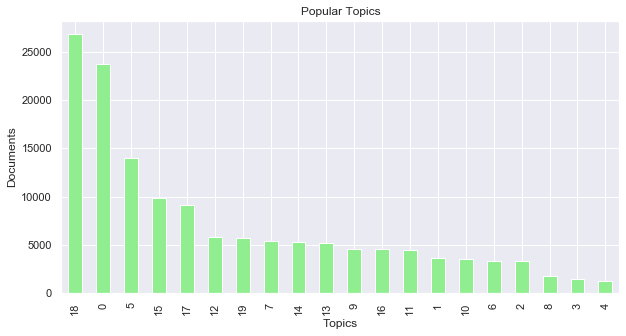

In [43]:
ax = sns.set(rc={'figure.figsize':(10,5)})
ax = document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightgreen')
ax.set_title('Popular Topics')
ax.set_xlabel('Topics')
ax.set_ylabel('Documents')